## Generating Continuous Random Variables using SciPy and NumPy

In this notebook, we will:

- Generate random samples from several continuous distributions:
  - **Uniform**
  - **Normal**
  - **Exponential**
  - **Gamma**
- Plot their **Probability Density Function (PDF)** and **Cumulative Distribution Function (CDF)**
- Discuss and show the theoretical **Moment Generating Functions (MGF)**
- Calculate expectations, variances, and higher-order moments.

We will use `scipy.stats` for most distributions and `numpy` for sample generation and analysis.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Uniform Distribution

The continuous Uniform distribution over the interval $ [a, b] $ has the PDF:

$
f(x) = \frac{1}{b-a}, \quad a \le x \le b
$

Its moment generating function (MGF) is given by:

$
M_X(t) = \frac{e^{bt} - e^{at}}{t(b-a)} \quad (t \neq 0, \; M_X(0)=1)
$

For this example, we take $a=0$ and $b=1$.

In [2]:
# Parameters
a, b = 0, 1

# Create a uniform distribution object (scipy uses loc=a and scale=b-a)
uniform_dist = stats.uniform(a, b-a)

# Generate a sample of 1000 points
sample_size = 1000
uniform_sample = uniform_dist.rvs(size=sample_size)
uniform_sample

array([3.58941155e-02, 7.53237861e-02, 9.40157554e-01, 8.66406301e-01,
       3.22221956e-01, 3.18571522e-01, 6.20757490e-01, 8.14052188e-01,
       4.09987210e-01, 4.34126311e-01, 4.06037410e-01, 5.19844361e-01,
       3.66125119e-02, 6.38829170e-01, 7.15447006e-01, 8.42275579e-01,
       5.65333091e-01, 9.82681817e-02, 4.75622931e-01, 8.37612475e-01,
       6.47543497e-01, 2.73447018e-01, 8.97649929e-01, 4.13172972e-01,
       4.85487380e-01, 2.32982980e-01, 5.86665768e-01, 6.68866693e-01,
       6.99354280e-01, 4.01437554e-01, 9.71111712e-01, 4.84043266e-01,
       6.84305956e-01, 1.57987361e-01, 3.11257396e-01, 2.73869459e-01,
       2.25026831e-01, 6.72070313e-01, 2.13644053e-01, 1.53309585e-01,
       5.84463938e-01, 4.50860458e-01, 6.22470517e-01, 8.64433264e-01,
       6.81458495e-01, 7.35557344e-01, 8.96201330e-01, 1.80142018e-02,
       2.20155931e-01, 1.14384597e-01, 8.93275024e-01, 8.34838945e-01,
       6.00866315e-01, 1.56303481e-01, 8.26952562e-01, 4.24998896e-01,
      

In [3]:
uniform_dist.pdf(0.5)

1.0

In [4]:
uniform_dist.cdf(0.6)

0.6

In [5]:
# Compute theoretical PDF and CDF over a grid
x_uniform = np.linspace(a, b, 200)
pdf_uniform = uniform_dist.pdf(x_uniform)
cdf_uniform = uniform_dist.cdf(x_uniform)

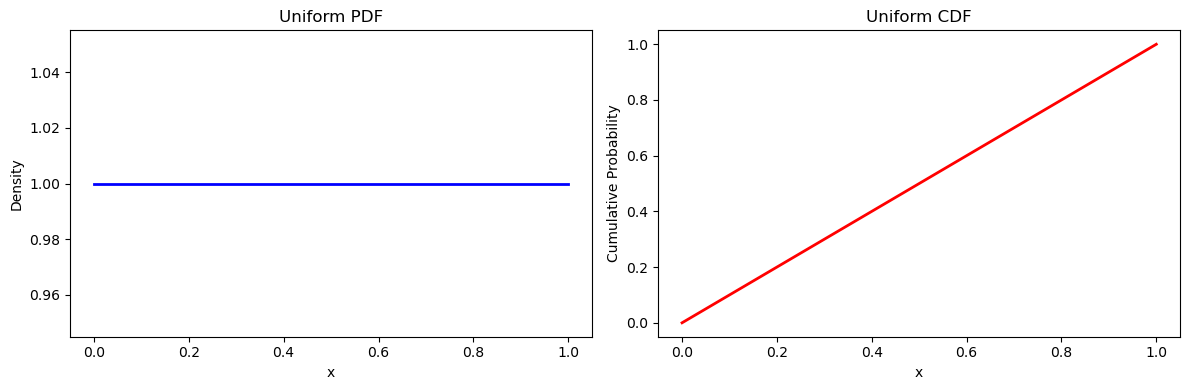

In [6]:
# Plot PDF and CDF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x_uniform, pdf_uniform, 'b-', lw=2)
ax[0].set_title('Uniform PDF')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density')

ax[1].plot(x_uniform, cdf_uniform, 'r-', lw=2)
ax[1].set_title('Uniform CDF')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

In [7]:
# Theoretical mean and variance
mean_uniform = uniform_dist.mean()
var_uniform = uniform_dist.var()
print("Uniform Mean (theoretical):", mean_uniform)
print("Uniform Variance (theoretical):", var_uniform)

Uniform Mean (theoretical): 0.5
Uniform Variance (theoretical): 0.08333333333333333


### 2. Normal Distribution

The Normal (Gaussian) distribution with mean $\mu$ and standard deviation $\sigma$ has the PDF:

$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$

Its MGF is:

$
M_X(t) = \exp\left(\mu t + \frac{\sigma^2 t^2}{2}\right)
$

For this example, we use the standard normal distribution ($\mu=0$, $\sigma=1$).

In [8]:
mu, sigma = -5, 1
normal_dist = stats.norm(mu, sigma)

# Generate a sample
normal_sample = normal_dist.rvs(size=sample_size)

In [9]:
normal_sample

array([-6.50666449, -6.03696883, -5.85693232, -4.89342458, -4.0534789 ,
       -3.50002457, -5.09857951, -5.35870669, -4.9005891 , -3.1027715 ,
       -3.49828395, -3.6585433 , -2.71596373, -4.068362  , -5.42389958,
       -6.64275   , -4.51564565, -5.35816846, -6.2275596 , -4.26943351,
       -5.07625037, -5.68763125, -4.20305917, -6.7469375 , -4.00241185,
       -6.07885033, -3.02460564, -5.68440609, -6.1237675 , -6.74752969,
       -5.56571845, -4.42636533, -3.92665468, -6.2122784 , -4.6270048 ,
       -5.72756359, -6.56092748, -5.07856077, -3.72561841, -2.6712993 ,
       -5.35762765, -3.7726248 , -5.78963695, -5.95650642, -2.26307184,
       -4.81035954, -4.74805012, -3.71870734, -6.38996676, -6.20272374,
       -5.40496426, -2.75510164, -6.10605321, -3.42745832, -5.10349907,
       -5.17846112, -3.79790333, -2.54161217, -4.47647277, -5.48345015,
       -5.86900665, -6.85351918, -6.23818801, -5.07762674, -5.00580599,
       -4.02247736, -4.97339553, -4.26229841, -5.85949019, -5.83

In [10]:
normal_dist.pdf(-5)

0.3989422804014327

In [11]:
normal_dist.cdf(-5 - sigma)

0.15865525393145707

In [12]:
normal_dist.cdf(-5 - sigma*3)

0.0013498980316300933

In [13]:
normal_dist.ppf([0.005,0.995])

array([-7.5758293, -2.4241707])

In [14]:
x_normal = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
pdf_normal = normal_dist.pdf(x_normal)
cdf_normal = normal_dist.cdf(x_normal)

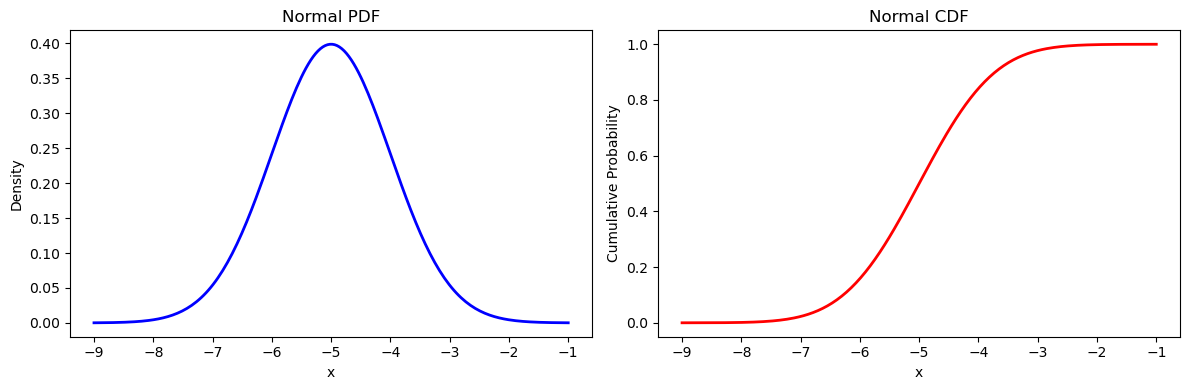

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x_normal, pdf_normal, 'b-', lw=2)
ax[0].set_title('Normal PDF')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density')

ax[1].plot(x_normal, cdf_normal, 'r-', lw=2)
ax[1].set_title('Normal CDF')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


In [16]:
# Theoretical mean and variance
mean_normal = normal_dist.mean()
var_normal = normal_dist.var()
print("Normal Mean (theoretical):", mean_normal)
print("Normal Variance (theoretical):", var_normal)

Normal Mean (theoretical): -5.0
Normal Variance (theoretical): 1.0


### 3. Exponential Distribution

The Exponential distribution (often used to model waiting times) with rate parameter $\lambda$ (or scale $\theta=1/\lambda$) has the PDF:

$
f(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$

Its MGF is:

$
M_X(t) = \frac{\lambda}{\lambda - t}, \quad t < \lambda
$

For this example, let $\lambda = 1$ (i.e. $\theta = 1$).

In [17]:
# Parameters
lambda_exp = 1
expon_dist = stats.expon(scale=1/lambda_exp)  # scale = 1/lambda

# Generate a sample
expon_sample = expon_dist.rvs(size=sample_size)

In [18]:
expon_sample

array([7.83029170e-01, 6.57063251e-01, 4.02219240e-01, 1.01717605e+00,
       3.01441661e-01, 8.99219774e-01, 1.43636424e+00, 2.02144477e-01,
       2.04261199e+00, 1.03066505e+00, 4.65579510e-01, 1.94883271e+00,
       1.43658868e+00, 6.42107858e-02, 9.41347549e-01, 5.04724870e-01,
       2.82074204e+00, 7.86860053e-01, 8.40049533e-01, 1.34396392e-01,
       3.24973751e-01, 2.58176128e-01, 1.83736070e-01, 1.07027209e-01,
       2.05828352e-02, 2.70555464e-01, 4.11484855e-01, 2.00979263e+00,
       8.07438999e-01, 2.90924116e-01, 7.27913186e-01, 9.32280101e-02,
       3.17987487e-02, 5.74490786e-01, 1.33989613e+00, 1.71355465e+00,
       1.98664604e+00, 1.97953368e+00, 9.25663573e-01, 6.32841855e-01,
       1.68293559e+00, 8.57246232e-02, 1.18473397e-01, 3.23473672e-02,
       1.17302360e-02, 8.38870915e-01, 1.95640235e+00, 1.26839547e-01,
       5.40809813e-01, 3.34876126e-01, 3.44441184e-01, 3.15696217e-01,
       2.11953663e+00, 7.64733643e-01, 5.43552487e-01, 2.73594230e+00,
      

In [19]:
# Compute PDF and CDF
expon_dist.pdf(-2)

0.0

In [20]:
cdf_expon = expon_dist.cdf(0)
#100 times: cdf_expon = expon_dist.cdf(0) *100

In [21]:
# Compute PDF and CDF
x_expon = np.linspace(0, 8, 200)
pdf_expon = expon_dist.pdf(x_expon)
cdf_expon = expon_dist.cdf(x_expon)

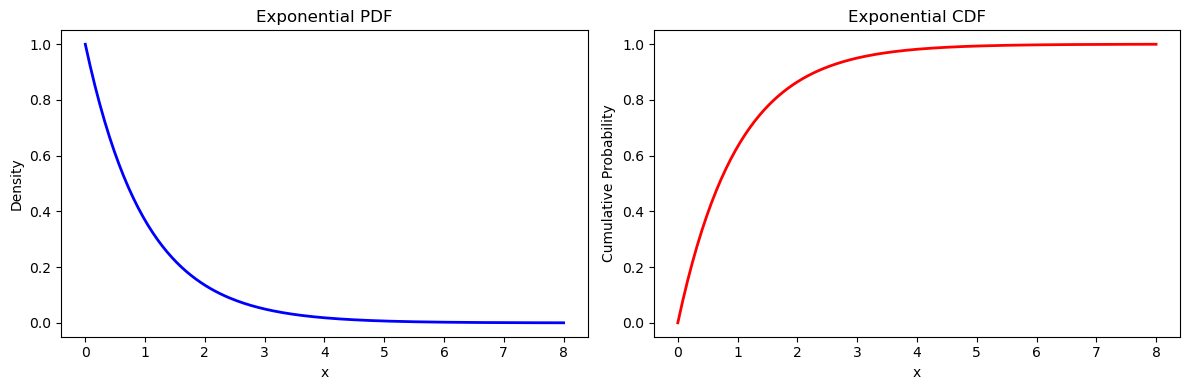

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x_expon, pdf_expon, 'b-', lw=2)
ax[0].set_title('Exponential PDF')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density')

ax[1].plot(x_expon, cdf_expon, 'r-', lw=2)
ax[1].set_title('Exponential CDF')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

### 4. Gamma Distribution

The Gamma distribution is defined by a shape parameter $k$ (or $\alpha$) and a scale parameter $\theta$. Its PDF is:

$
f(x) = \frac{x^{k-1} e^{-x/\theta}}{\theta^k \Gamma(k)}, \quad x \ge 0
$

The MGF is given by:

$
M_X(t) = (1 - \theta t)^{-k}, \quad t < \frac{1}{\theta}
$

For this example, let $ k=2 $ and $ \theta=2 $.

In [23]:
# Parameters
k, llambda = 2, 2
gamma_dist = stats.gamma(a=k, scale=1/llambda)

In [24]:
# Generate a sample
gamma_sample = gamma_dist.rvs(size=sample_size)

In [25]:
gamma_dist.ppf([0,0.9])

array([0.        , 1.94486008])

In [26]:
x_gamma = np.linspace(0, 20, 200)
pdf_gamma = gamma_dist.pdf(x_gamma)
cdf_gamma = gamma_dist.cdf(x_gamma)

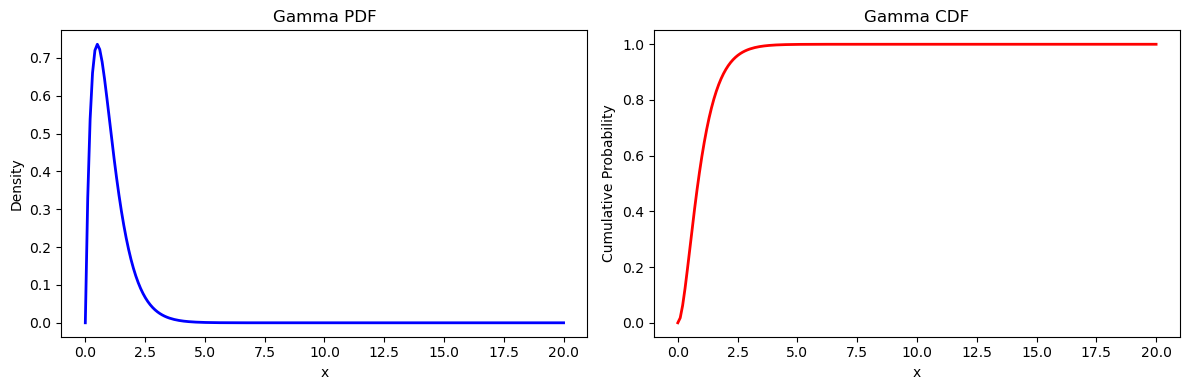

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x_gamma, pdf_gamma, 'b-', lw=2)
ax[0].set_title('Gamma PDF')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density')

ax[1].plot(x_gamma, cdf_gamma, 'r-', lw=2)
ax[1].set_title('Gamma CDF')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

In [28]:
# Theoretical mean and variance
mean_gamma = gamma_dist.mean()
var_gamma = gamma_dist.var()
print("Gamma Mean (theoretical):", mean_gamma)
print("Gamma Variance (theoretical):", var_gamma)


Gamma Mean (theoretical): 1.0
Gamma Variance (theoretical): 0.5


#### Create a density plot for the empirical Gamma distribution with parameter (2.5, 3) with 1000 samples

In [29]:
k, llambda = 2.5, 3
gamma_dist = stats.gamma(a=k, scale=1/llambda)
gamma_sample = gamma_dist.rvs(size=1000)

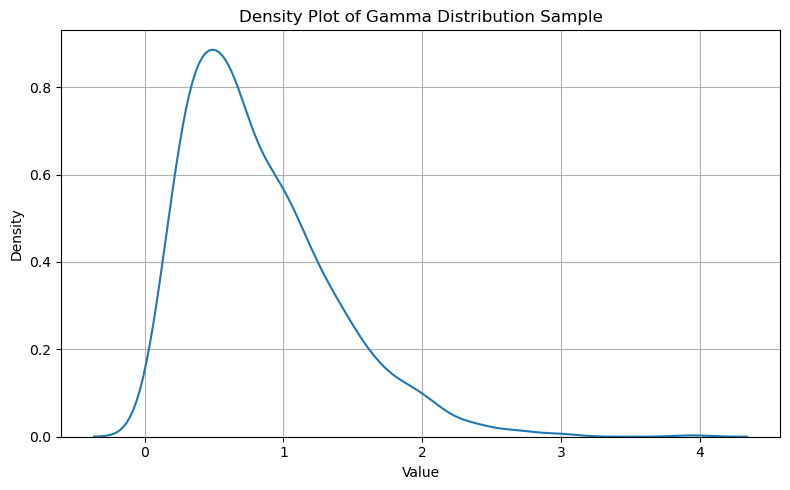

In [30]:
# Plot the density plot (KDE)
plt.figure(figsize=(8, 5))
sns.kdeplot(gamma_sample)
plt.title('Density Plot of Gamma Distribution Sample')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

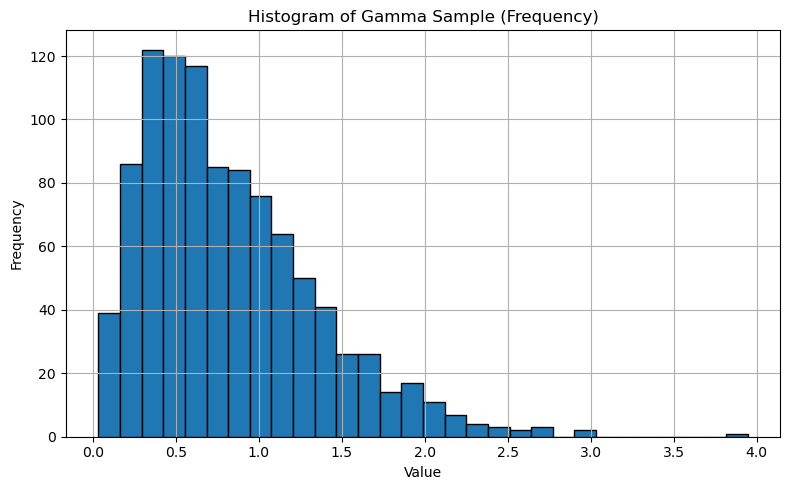

In [31]:
# Plot histogram with frequency (not density)
plt.figure(figsize=(8, 5))
plt.hist(gamma_sample, bins=30, edgecolor='black')
plt.title('Histogram of Gamma Sample (Frequency)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Exercise: What is the best value for the number of bins?

In [33]:
#too many bins: graph is too discrete, too small, graph is too coarse. 

SyntaxError: invalid syntax (159996393.py, line 1)

In [34]:
# Exercise: Create a density plot for the empirical lognormal distribution with parameter (0, 1) with 1000 samples.
# Compare it with normal distribution.

In [35]:
normal_dist = stats.norm(0, 1)
normal_sample = normal_dist.rvs(size=1000)
lognormal = np.exp(normal_sample)

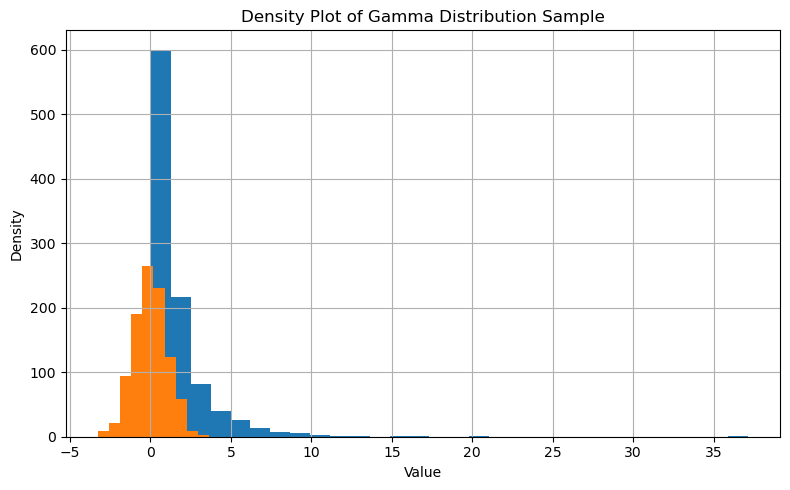

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(lognormal, bins=30, label = 'lognormal')
plt.hist(normal_sample,bins=10, label = 'normal')
plt.title('Density Plot of Gamma Distribution Sample')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

## Universality with Logistic

For $U \sim Unif(0, 1)$, the r.v.  $log\left(\frac{U}{1−U}\right)$ follows a Logistic distribution. In SciPy and `uniform.rvs`, we can simply generate a large number of $Unif(0, 1)$ realizations and transform them.

In [37]:
from scipy.stats import uniform
u = uniform.rvs(size=10**4)
x = np.log(u/(1-u))
x

array([ 1.54801795, -1.26369418,  1.06386436, ...,  0.1502669 ,
       -0.26014622, -0.45696318])

Now `x` contains 10<sup>4</sup> realizations from the distribution of $log\left(\frac{U}{1−U}\right)$. We can visualize them with a histogram, using [`matplotlib.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). The histogram resembles a Logistic PDF, which is reassuring. To control how fine-grained the histogram is, we can set the number of bins in the histogram via the `bins` parameter (the 2nd parameter passed into `pyplot.hist`: `hist(x, 100)` produces a finer histogram, while `hist(x, 10)` produces a coarser histogram.

To illustrate, we will generate two graphs side-by-side with [`pyplot.figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html), and use a [`pyplot.subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) for each graph.

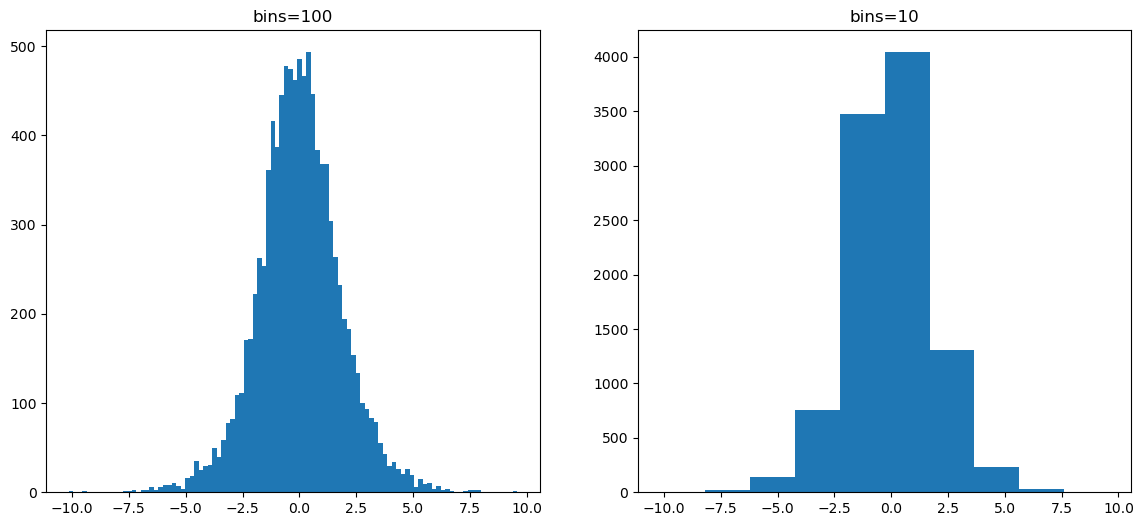

In [38]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
ax1.hist(x, 100)
ax1.set_title('bins=100')

ax2 = fig.add_subplot(122)
ax2.hist(x, 10)
ax2.set_title('bins=10')

plt.show()

#### Create the CDF for the data in x

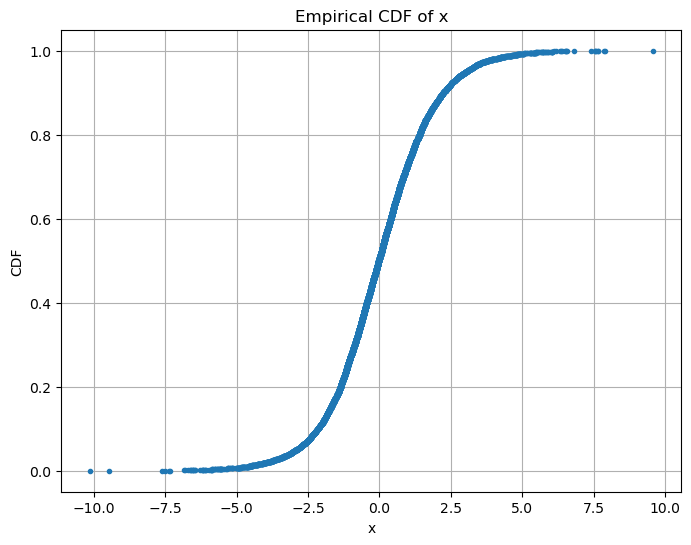

In [39]:
# Sort the data
x_sorted = np.sort(x)
y = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

# Plot CDF
plt.figure(figsize=(8, 6))
plt.plot(x_sorted, y, marker='.', linestyle='none')
plt.title('Empirical CDF of x')
plt.xlabel('x')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

## Poisson process simulation

To simulate $n$ arrivals in a Poisson process with rate $\lambda$, we first generate the interarrival times as i.i.d. Exponentials and store them in variable `x`:

In [40]:
n = 50
lambd = 10
x = stats.expon.rvs(scale=1/lambd, size=n)
print(x)

[0.07577849 0.11074084 0.01330535 0.02607706 0.0330535  0.03823557
 0.10764308 0.00083005 0.14756586 0.32231654 0.22212564 0.05867206
 0.03617565 0.09104641 0.11466525 0.13630108 0.04503035 0.07807473
 0.05991774 0.07538436 0.20908154 0.09152748 0.20269765 0.09372024
 0.06029868 0.0731091  0.0355803  0.02166741 0.23506339 0.01029873
 0.06641787 0.09371123 0.08522585 0.06614715 0.1164314  0.02016998
 0.10062457 0.18002168 0.07439872 0.04985129 0.05599723 0.57127981
 0.18126311 0.13008096 0.02343216 0.04720313 0.22238273 0.00223844
 0.12316561 0.0066168 ]


Then we convert the interarrival times into arrival times using the [`numpy.cumsum`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cumsum.html) function, which stands for "cumulative sum".

In [41]:
t = np.cumsum(x)
print(t)

[0.07577849 0.18651934 0.19982469 0.22590175 0.25895525 0.29719082
 0.4048339  0.40566395 0.55322981 0.87554635 1.09767199 1.15634404
 1.19251969 1.2835661  1.39823135 1.53453243 1.57956278 1.6576375
 1.71755525 1.79293961 2.00202116 2.09354864 2.29624629 2.38996653
 2.45026521 2.52337431 2.55895461 2.58062202 2.81568541 2.82598414
 2.892402   2.98611323 3.07133908 3.13748623 3.25391764 3.27408762
 3.37471219 3.55473387 3.62913259 3.67898388 3.73498111 4.30626093
 4.48752403 4.61760499 4.64103716 4.68824029 4.91062302 4.91286146
 5.03602707 5.04264387]


The array `t` now contains all the simulated arrival times.

## Use SimPy for symbolic math expressions

In [42]:
from sympy import symbols
from sympy.stats import Normal, density, cdf

# Define the random variable
X = Normal('X', 0, 1)

# Compute the Probability Density Function (PDF)
pdf_X = density(X)(X)
pdf_X

sqrt(2)*exp(-X**2/2)/(2*sqrt(pi))

In [43]:
# Compute the Cumulative Distribution Function (CDF)
cdf_X = cdf(X)(X)
cdf_X

erf(sqrt(2)*X/2)/2 + 1/2

ERF fucntion:

$erf(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,\mathrm dt$

In [44]:
cdf??

In [45]:
cdf(X)(0.5)

erf(0.25*sqrt(2))/2 + 1/2

In [46]:
density(X)(0)

sqrt(2)/(2*sqrt(pi))

In [47]:
density(X)(X+9)

sqrt(2)*exp(-(X + 9)**2/2)/(2*sqrt(pi))

In [48]:
from sympy.stats import E

# Calculate the expectation of X
expectation_X = E(X)
expectation_X

0

In [49]:
from sympy.stats import P
P(X>1)

sqrt(2)*(-sqrt(2)*sqrt(pi)*erf(sqrt(2)/2) + sqrt(2)*sqrt(pi))/(4*sqrt(pi))

In [50]:
from sympy import symbols
from sympy.stats import Uniform, density, cdf, E, variance

In [51]:
density(X)(X)

sqrt(2)*exp(-X**2/2)/(2*sqrt(pi))

In [52]:
cdf(X)(X)

erf(sqrt(2)*X/2)/2 + 1/2

In [53]:
E(X)

0

In [54]:
variance(X)

1

In [55]:
from sympy import symbols
from sympy.stats import Exponential, density, cdf, E, variance

# Define the rate parameter
lambda_ = 3

# Define the exponential random variable
Y = Exponential('Y', lambda_)

In [56]:
density(Y)(Y)

3*exp(-3*Y)

In [57]:
cdf(Y)(Y)

Piecewise((1 - exp(-3*Y), Y >= 0), (0, True))

In [58]:
E(Y)

1/3

In [59]:
variance(Y)

1/9

In [60]:
# Execrise: Calculate the probability that Y is larger than 4.

In [ ]:
P(Y>4)

In [61]:
from sympy import symbols
from sympy.stats import Gamma, density, cdf, E, variance

# Define the shape and rate parameters
k, theta = 3, 2

# Define the gamma random variable
W = Gamma('W', k, theta)

In [62]:
variance(W)

12

In [63]:
density(W)(W)

exp(-W/2)*W**2/16

In [64]:
cdf(W)(W)

Piecewise((-(W**2/8 + W/2 + 1)*exp(-W/2) + 1, W > 0), (0, True))

In [65]:
E(W)

6

In [66]:
## Keep the parameter lambda in symbolic forms

In [67]:
from sympy import symbols
from sympy.stats import Gamma, density, E, variance, cdf

# Define symbolic lambda
lam = symbols('lambda', positive=True)

# Define the gamma random variable: shape = 3, rate = lambda
X = Gamma('X', 3, 1/lam)


In [68]:
density(X)(X)

lambda**3*exp(-lambda*X)*X**2/2

In [69]:
E(X)

3/lambda

In [70]:
variance(X)

3/lambda**2

In [71]:
# Execrise: Calculate the probability that Gamma(3, lambda) is larger than 5, as a function of lambda

In [72]:
# Execrise: Derive the density function for lognormal distribution with parameter mu and sigma^2

In [73]:
# integration and differentiation

In [74]:
from sympy import symbols, integrate, exp, sin
x, y = symbols('x y')

# Integrate e^x with respect to x
integrate(exp(3*x) + sin(y), x)

x*sin(y) + exp(3*x)/3

In [75]:
integrate(exp(3*x) + sin(y), y)

y*exp(3*x) - cos(y)

In [76]:
from sympy import diff

x, y = symbols('x y')

# Integrate e^x with respect to x
diff(exp(3*x) + sin(y), x)

3*exp(3*x)

In [77]:
# Execrise: Use integration to calculate the CDF function of exponential distribution with parameter 5